In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
from wordcloud import WordCloud
import matplotlib.pyplot as plt #绘制图像的模块
import jieba     


In [2]:
data1 = pd.read_csv("shuju1.csv",encoding='gbk',parse_dates=['支付时间'])

In [3]:
data1.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
0,DD201708167493663618499909784,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017/1/1 0:53,D,已出货未退款,已提现
1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017/1/1 1:33,A,已出货未退款,已提现
2,DD201708167493578526890939886,E43A6E078A06874,5.5,5.5,430g泰奇八宝粥,2017/1/1 8:45,E,已出货未退款,已提现
3,DD201708167493683507186615837,E43A6E078A04228,5.0,5.0,48g好丽友薯愿香烤原味,2017/1/1 9:05,C,已出货未退款,已提现
4,DD201708167493759548618252006,E43A6E078A04134,3.0,3.0,600ml可口可乐,2017/1/1 9:41,B,已出货未退款,已提现


In [4]:
data1.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
0,DD201708167493663618499909784,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017/1/1 0:53,D,已出货未退款,已提现
1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017/1/1 1:33,A,已出货未退款,已提现
2,DD201708167493578526890939886,E43A6E078A06874,5.5,5.5,430g泰奇八宝粥,2017/1/1 8:45,E,已出货未退款,已提现
3,DD201708167493683507186615837,E43A6E078A04228,5.0,5.0,48g好丽友薯愿香烤原味,2017/1/1 9:05,C,已出货未退款,已提现
4,DD201708167493759548618252006,E43A6E078A04134,3.0,3.0,600ml可口可乐,2017/1/1 9:41,B,已出货未退款,已提现


In [5]:
data2 = pd.read_csv("shuju2.csv",encoding='gbk')

In [6]:
data2.head()

,商品,大类,二级类
0,100g*5瓶益力多,饮料,乳制品
1,100g越南LIPO奶味面包干,非饮料,饼干糕点
2,10g卫龙亲嘴烧香辣味,非饮料,肉干/豆制品/蛋
3,10g越南LIPO奶味面包干,非饮料,饼干糕点
4,110g顺宝九制话梅,非饮料,蜜饯/果干


In [7]:
data2.head()

,商品,大类,二级类
0,100g*5瓶益力多,饮料,乳制品
1,100g越南LIPO奶味面包干,非饮料,饼干糕点
2,10g卫龙亲嘴烧香辣味,非饮料,肉干/豆制品/蛋
3,10g越南LIPO奶味面包干,非饮料,饼干糕点
4,110g顺宝九制话梅,非饮料,蜜饯/果干


In [8]:
data1.shape

(70680, 9)

In [9]:
data1 = data1.dropna()

In [10]:
data1.shape

(70680, 9)

In [11]:
data2.shape

(315, 3)

In [12]:
data2 = data2.dropna()

In [13]:
data2.shape

(315, 3)

In [14]:
data1.loc[data1["地点"] == "A"].head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017/1/1 1:33,A,已出货未退款,已提现
16,DD201708167493663388737478695,E43A6E078A04172,5.8,5.8,100g卫龙点心面黑椒牛排味,2017/1/1 19:29,A,已出货未退款,已提现
17,DD201708167493663381827746988,E43A6E078A04172,0.8,0.8,咪咪虾条马来西亚风味,2017/1/1 19:33,A,已出货未退款,已提现
20,DD201708167493683503095993712,E43A6E078A04172,3.0,3.0,250ml维他柠檬茶,2017/1/1 19:55,A,已出货未退款,已提现
22,DD2017081110292488D71D623E8F9,E43A6E078A04172,3.5,3.5,东鹏特饮,2017/1/1 20:18,A,已出货未退款,已提现


In [15]:
data1.地点.head()

0    D
1    A
2    E
3    C
4    B
Name: 地点, dtype: object

In [16]:
machineA = data1.loc[data1["地点"] == "A"]

In [17]:
machineA.to_csv("task1-1A.csv")

In [18]:
machineA["实际金额"].sum()

42542.6

In [19]:
gooodA = machineA.商品

In [20]:
gooodA.to_csv("GoodA.csv")

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [21]:
machineB = data1.loc[data1["地点"] == "B"]

In [22]:
machineB.to_csv("task1-1B.csv")

In [23]:
machineB["实际金额"].sum()

53970.3

In [24]:
gooodB = machineB.商品

In [25]:
gooodB.to_csv("GoodB.csv")

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [26]:
machineC = data1.loc[data1["地点"] == "C"]

In [27]:
machineC.to_csv("task1-1C.csv")

In [28]:
machineC["实际金额"].sum()

61572.1

In [29]:
gooodC = machineC.商品

In [30]:
gooodC.to_csv("GoodC.csv")

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [47]:
machineD = data1.loc[data1["地点"] == "D"]

In [48]:
machineD.to_csv("task1-1D.csv")

In [49]:
gooodD = machineD.商品

In [50]:
gooodD.to_csv("GoodD.csv")

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [52]:
machineD["实际金额"].sum()

33243.299999999996

In [53]:
machineE = data1.loc[data1["地点"] == "E"]

In [54]:
machineE.to_csv("task1-1E.csv")

In [55]:
machineE["实际金额"].sum()

95655.4

In [56]:
gooodE = machineE.商品

In [40]:
gooodE.to_csv("GoodE.csv")

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [41]:
machineA1 = machineA[machineA.支付时间.str.contains('2017/5')]

In [42]:
machineA2 = machineA[machineA.支付时间.str.contains('2017/6')]

In [43]:
machineA1.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
7053,DD201708167493823507395705685,E43A6E078A04172,0.8,0.8,咪咪虾条马来西亚风味,2017/5/1 2:11,A,已出货未退款,已提现
7054,DD201708167493823379644601978,E43A6E078A04172,3.0,3.0,250ml维他原味豆奶,2017/5/1 2:12,A,已出货未退款,已提现
7057,DD20170719180814544A17289F6B9,E43A6E078A04172,3.0,3.0,可口可乐（500ml）,2017/5/1 2:30,A,已出货未退款,已提现
7078,DD201708167493963563058950123,E43A6E078A04172,4.0,4.0,阿萨姆奶茶,2017/5/1 7:03,A,已出货未退款,已提现
7080,DD201708167493963565504582914,E43A6E078A04172,2.5,2.5,伊利纯牛奶,2017/5/1 7:04,A,已出货未退款,已提现


In [44]:
machineA1["实际金额"].sum()

3385.1

In [45]:
machineB1 = machineB[machineB.支付时间.str.contains('2017/5')]

In [46]:
machineB2 = machineB[machineB.支付时间.str.contains('2017/6')]

In [47]:
machineB1.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
7046,DD2017071918075974A794CB8C5B1,E43A6E078A04134,4.0,4.0,阿萨姆奶茶,2017/5/1 0:03,B,已出货未退款,已提现
7048,DD2017081674930598730566838537,E43A6E078A04134,20.0,20.0,145ml旺仔牛奶盒装,2017/5/1 0:30,B,已出货未退款,已提现
7049,DD2017081674930598972927113082,E43A6E078A04134,2.5,2.5,30g无穷农场盐_鸡蛋,2017/5/1 0:52,B,已出货未退款,已提现
7050,DD2017081674930599495528503044,E43A6E078A04134,4.0,4.0,450ml美汁源果粒橙,2017/5/1 0:59,B,已出货未退款,已提现
7051,DD2017081674930599891757204268,E43A6E078A04134,4.5,4.5,40g呀土豆番茄酱味,2017/5/1 1:00,B,已出货未退款,已提现


In [48]:
machineB1["实际金额"].sum()

3681.2

In [49]:
machineC1 = machineC[machineC.支付时间.str.contains('2017/5')]

In [50]:
machineC2 = machineC[machineC.支付时间.str.contains('2017/6')]

In [51]:
machineC1.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
7045,DD2017081674930598278687133911,E43A6E078A04228,10.0,10.0,85g统一老坛酸菜牛肉面,2017/5/1 0:02,C,已出货未退款,已提现
7059,DD201708167493963521010541805,E43A6E078A04228,3.0,3.0,统一绿茶,2017/5/1 2:31,C,已出货未退款,已提现
7061,DD2017081674930601876963944036,E43A6E078A04228,1.5,1.5,45g双汇泡面拍挡,2017/5/1 3:10,C,已出货未退款,已提现
7062,DD2017081674930602004305105563,E43A6E078A04228,6.0,6.0,13g无穷烤鸡小腿蜂蜜味,2017/5/1 4:19,C,已出货未退款,已提现
7084,DD201708167493060658600753923,E43A6E078A04228,3.5,3.5,丽芝士纳宝帝奶酪威化饼干,2017/5/1 7:46,C,已出货未退款,已提现


In [52]:
machineC1["实际金额"].sum()

3729.4

In [53]:
machineD1 = machineD[machineD.支付时间.str.contains('2017/5')]

In [54]:
machineD2 = machineD[machineD.支付时间.str.contains('2017/6')]

In [55]:
machineD1.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
7077,DD2017081674930604862244740025,E43A6E078A07631,5.5,5.5,480ml小茗同学冷泡青柠红茶,2017/5/1 6:07,D,已出货未退款,已提现
7090,DD20170816749382313664377872,E43A6E078A07631,12.0,12.0,美汁源果粒橙,2017/5/1 10:59,D,已出货未退款,已提现
7091,DD20170816749382279350512184,E43A6E078A07631,9.0,9.0,58g丽芝士纳宝帝奶酪威化饼干,2017/5/1 11:00,D,已出货未退款,已提现
7101,DD201708167493820491989772398,E43A6E078A07631,4.5,4.5,78g卫龙亲嘴语辣条,2017/5/1 12:41,D,已出货未退款,已提现
7115,DD20170601143710138BA514E51BA,E43A6E078A07631,3.0,3.0,雪碧最新款,2017/5/1 14:20,D,已出货未退款,已提现


In [56]:
machineD1["实际金额"].sum()

2392.1

In [57]:
machineE1 = machineE[machineE.支付时间.str.contains('2017/5')]

In [58]:
machineE2 = machineE[machineE.支付时间.str.contains('2017/6')]

In [59]:
machineE1.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
7047,DD201708167493963381910837362,E43A6E078A06874,3.0,3.0,维他奶,2017/5/1 0:03,E,已出货未退款,已提现
7058,DD201708167493963443839790152,E43A6E078A06874,3.0,3.0,卫龙大面筋,2017/5/1 2:30,E,已出货未退款,已提现
7060,DD201707211759107589BA569E177,E43A6E078A06874,3.5,3.5,伊利纯牛奶,2017/5/1 2:31,E,已出货未退款,已提现
7063,DD2017081674930602823601915419,E43A6E078A06874,4.5,4.5,55g奥利奥原味夹心饼干,2017/5/1 5:32,E,已出货未退款,已提现
7065,DD20170721175936839EEB8817B10,E43A6E078A06874,3.5,3.5,芬达330ml,2017/5/1 5:33,E,已出货未退款,已提现


In [60]:
machineE1["实际金额"].sum()

5699.0

In [61]:
#machineA2 = machineA1["商品"].unique()

In [62]:
#machineA2

In [63]:
machineA1.商品.count()

756

In [64]:
#2017/5 所有售货机总销售额

In [65]:
data1.实际金额.sum()

286983.7

In [66]:
#2017/5 所有售货机订单量

In [67]:
data1.订单号.count()

70680

In [68]:
machineA1["商品"].value_counts().head()

30g无穷农场盐_鸡蛋     39
40g双汇玉米热狗肠      32
32g卫龙亲嘴烧        24
250ml维他柠檬茶      22
13g无穷烤鸡小腿蜂蜜味    20
Name: 商品, dtype: int64

In [69]:
machineB1["商品"].value_counts().head()

怡宝纯净水          38
30g无穷农场盐_鸡蛋    32
脉动             28
250ml维他柠檬茶     26
40g双汇玉米热狗肠     25
Name: 商品, dtype: int64

In [70]:
machineC1["商品"].value_counts().head()

250ml维他柠檬茶         29
30g无穷农场盐_鸡蛋        22
40g双汇玉米热狗肠         22
85g新麦潮北海道吐司        20
85g新麦潮手撕面包（提子味）    19
Name: 商品, dtype: int64

In [71]:
machineD1["商品"].value_counts().head()

30g无穷农场盐_鸡蛋      34
40g双汇玉米热狗肠       25
20g咪咪虾条马来西亚风味    21
250ml维他原味豆奶      15
13g无穷烤鸡小腿蜂蜜味     14
Name: 商品, dtype: int64

In [72]:
machineE1["商品"].value_counts().head()

怡宝纯净水         76
86g合味道海鲜风味    36
芬达330ml       34
250ml维他柠檬茶    33
40g双汇玉米热狗肠    32
Name: 商品, dtype: int64

In [73]:
machineA3 = machineA2["商品"].value_counts()

In [74]:
machineA3.head(5)

怡宝纯净水            61
东鹏特饮             52
脉动               50
20g咪咪虾条马来西亚风味    48
250ml维他柠檬茶       44
Name: 商品, dtype: int64

In [75]:
machineB3 = machineB2["商品"].value_counts()

In [76]:
machineB3.head(5)

怡宝纯净水          112
250ml维他柠檬茶      63
脉动              60
30g无穷农场盐_鸡蛋     60
250ml维他原味豆奶     56
Name: 商品, dtype: int64

In [77]:
machineC3 = machineC1["商品"].value_counts()

In [78]:
machineC3.head(5)

250ml维他柠檬茶         29
30g无穷农场盐_鸡蛋        22
40g双汇玉米热狗肠         22
85g新麦潮北海道吐司        20
85g新麦潮手撕面包（提子味）    19
Name: 商品, dtype: int64

In [79]:
machineD3 = machineD2["商品"].value_counts()

In [80]:
machineD3.head(5)

30g无穷农场盐_鸡蛋      50
怡宝纯净水            37
40g双汇玉米热狗肠       34
20g咪咪虾条马来西亚风味    33
东鹏特饮             32
Name: 商品, dtype: int64

In [81]:
machineE3 = machineE1["商品"].value_counts()

In [82]:
machineE3.head(5)

怡宝纯净水         76
86g合味道海鲜风味    36
芬达330ml       34
250ml维他柠檬茶    33
40g双汇玉米热狗肠    32
Name: 商品, dtype: int64

In [83]:
#每台售货机2017年5月份的交易额、订单量及所有售货机交易总额和订单总量

In [84]:
data1.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
0,DD201708167493663618499909784,E43A6E078A07631,4.5,4.5,68g好丽友巧克力派2枚,2017/1/1 0:53,D,已出货未退款,已提现
1,DD201708167493663555814061164,E43A6E078A04172,3.0,3.0,40g双汇玉米热狗肠,2017/1/1 1:33,A,已出货未退款,已提现
2,DD201708167493578526890939886,E43A6E078A06874,5.5,5.5,430g泰奇八宝粥,2017/1/1 8:45,E,已出货未退款,已提现
3,DD201708167493683507186615837,E43A6E078A04228,5.0,5.0,48g好丽友薯愿香烤原味,2017/1/1 9:05,C,已出货未退款,已提现
4,DD201708167493759548618252006,E43A6E078A04134,3.0,3.0,600ml可口可乐,2017/1/1 9:41,B,已出货未退款,已提现


In [85]:
#每台售货机每月的每单平均交易额与日均订单量

In [86]:
machineA3 = pd.DataFrame(machineA3.head(5))

In [87]:
machineA3

,商品
怡宝纯净水,61
东鹏特饮,52
脉动,50
20g咪咪虾条马来西亚风味,48
250ml维他柠檬茶,44


In [88]:
machineB3 = pd.DataFrame(machineB3.head(5))

In [89]:
machineB3

,商品
怡宝纯净水,112
250ml维他柠檬茶,63
脉动,60
30g无穷农场盐_鸡蛋,60
250ml维他原味豆奶,56


In [90]:
machineC3 = pd.DataFrame(machineC3.head(5))

In [91]:
machineC3

,商品
250ml维他柠檬茶,29
30g无穷农场盐_鸡蛋,22
40g双汇玉米热狗肠,22
85g新麦潮北海道吐司,20
85g新麦潮手撕面包（提子味）,19


In [92]:
machineD3 = pd.DataFrame(machineD3.head(5))

In [93]:
machineD3 

,商品
30g无穷农场盐_鸡蛋,50
怡宝纯净水,37
40g双汇玉米热狗肠,34
20g咪咪虾条马来西亚风味,33
东鹏特饮,32


In [94]:
machineE3 = pd.DataFrame(machineE3.head(5))

In [95]:
machineE3

,商品
怡宝纯净水,76
86g合味道海鲜风味,36
芬达330ml,34
250ml维他柠檬茶,33
40g双汇玉米热狗肠,32


In [96]:
machineE3.columns = ['E售货机销量前5商品量']

In [97]:
machineE3._stat_axis.values.tolist()

['怡宝纯净水', '86g合味道海鲜风味', '芬达330ml', '250ml维他柠檬茶', '40g双汇玉米热狗肠']

In [98]:
plt.rcParams['font.sans-serif'] = ['FangSong'] 
plt.rcParams['axes.unicode_minus'] = False 

In [99]:
machineA3.columns = ['A售货机销量前5商品量']

In [116]:
machineA3._stat_axis.values.tolist()

['怡宝纯净水', '东鹏特饮', '脉动', '20g咪咪虾条马来西亚风味', '250ml维他柠檬茶']

Text(0.5, 1.0, '2017年6月销量前5的商品销量柱状图A')

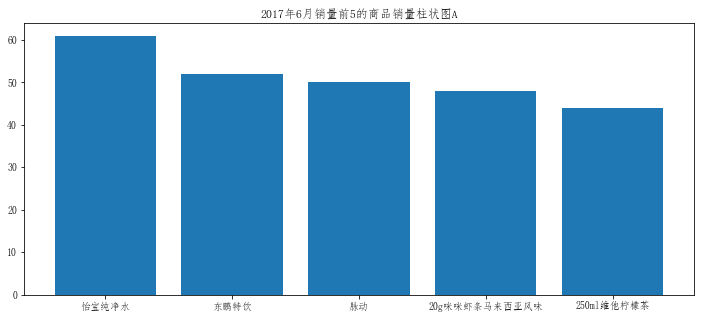

In [117]:
plt.figure(figsize=(12,5))
plt.bar(machineA3._stat_axis.values.tolist(), machineA3['A售货机销量前5商品量'])
plt.title('2017年6月销量前5的商品销量柱状图A')

In [118]:
machineB3.columns = ['B售货机销量前5商品量']

In [119]:
machineB3._stat_axis.values.tolist()

['怡宝纯净水', '250ml维他柠檬茶', '脉动', '30g无穷农场盐_鸡蛋', '250ml维他原味豆奶']

Text(0.5, 1.0, '2017年6月销量前5的商品销量柱状图B')

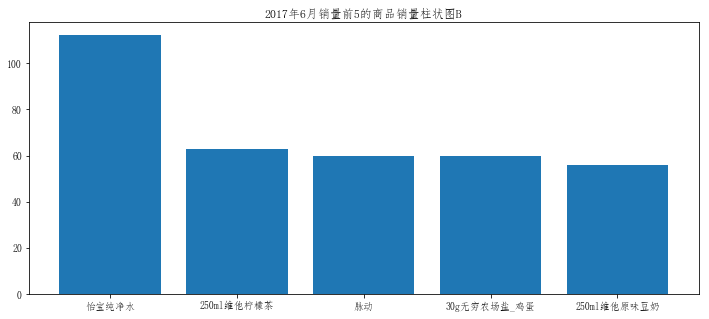

In [120]:
plt.figure(figsize=(12,5))
plt.bar(machineB3._stat_axis.values.tolist(), machineB3['B售货机销量前5商品量'])
plt.title('2017年6月销量前5的商品销量柱状图B')

In [121]:
machineC3.columns = ['C售货机销量前5商品量']

In [122]:
machineC3._stat_axis.values.tolist()

['250ml维他柠檬茶', '30g无穷农场盐_鸡蛋', '40g双汇玉米热狗肠', '85g新麦潮北海道吐司', '85g新麦潮手撕面包（提子味）']

Text(0.5, 1.0, '2017年6月销量前5的商品销量柱状图C')

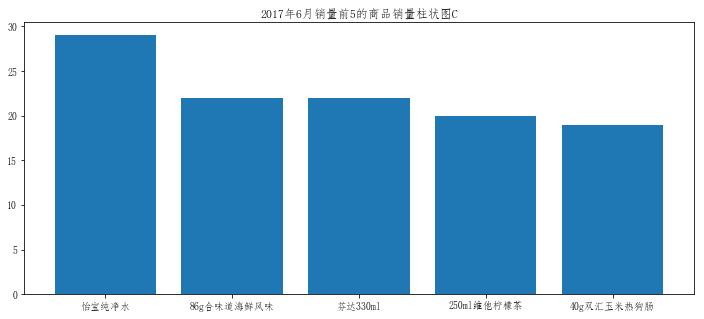

In [123]:
plt.figure(figsize=(12,5))
plt.bar(machineE3._stat_axis.values.tolist(),machineC3['C售货机销量前5商品量'])
plt.title('2017年6月销量前5的商品销量柱状图C')

In [124]:
machineD3.columns = ['D售货机销量前5商品量']

In [125]:
machineD3._stat_axis.values.tolist()

['30g无穷农场盐_鸡蛋', '怡宝纯净水', '40g双汇玉米热狗肠', '20g咪咪虾条马来西亚风味', '东鹏特饮']

In [126]:
machineE3._stat_axis.values.tolist()

['怡宝纯净水', '86g合味道海鲜风味', '芬达330ml', '250ml维他柠檬茶', '40g双汇玉米热狗肠']

Text(0.5, 1.0, '2017年6月销量前5的商品销量柱状图D')

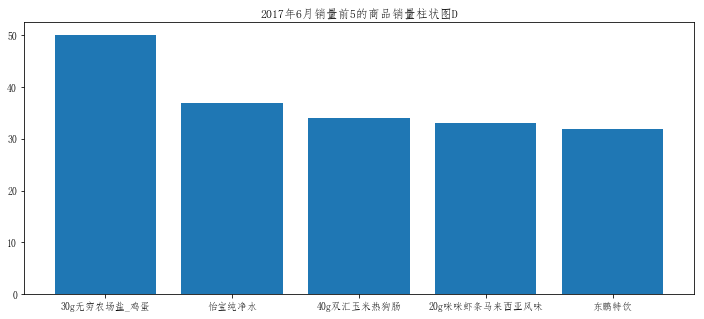

In [127]:
plt.figure(figsize=(12,5))
plt.bar(machineD3._stat_axis.values.tolist(),machineD3['D售货机销量前5商品量'])
plt.title('2017年6月销量前5的商品销量柱状图D')

Text(0.5, 1.0, '2017年6月销量前5的商品销量柱状图E')

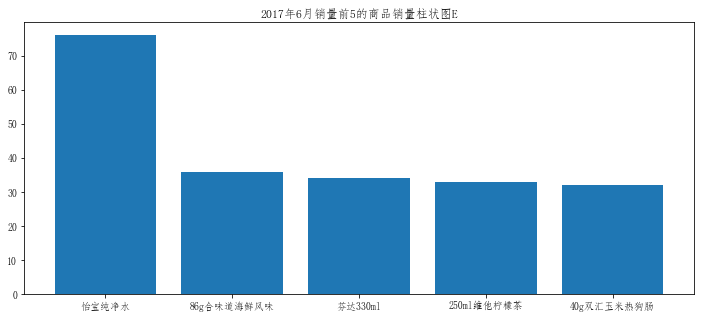

In [128]:
plt.figure(figsize=(12,5))
plt.bar(machineE3._stat_axis.values.tolist(), machineE3['E售货机销量前5商品量'])
plt.title('2017年6月销量前5的商品销量柱状图E')

In [129]:
machineC6 = machineC[machineC.支付时间.str.contains('2017/6')]

In [130]:
machineC71 = machineC[machineC.商品.str.contains('2017/7')]

In [131]:
machineC72 = machineC[machineC.支付时间.str.contains('2017/7')]

In [132]:
machineC8 = machineC[machineC.支付时间.str.contains('2017/8')]

In [133]:
machineC71 = machineC[machineC.支付时间.str.contains('2017/7')]

In [134]:
machineC7 = machineC[(machineC['支付时间'] == 2017/7)]

In [135]:
machineC71.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
20357,DD2017080121473573FDEC29E479B,E43A6E078A04228,3.0,3.0,怡宝纯净水,2017/7/1 0:08,C,已出货未退款,已提现
20358,DD201708167493450127008697062,E43A6E078A04228,5.0,5.0,500ml统一阿萨姆奶茶,2017/7/1 0:13,C,已出货未退款,已提现
20359,DD2017080121421510FF74C629546,E43A6E078A04228,3.0,3.0,怡宝纯净水,2017/7/1 0:13,C,已出货未退款,已提现
20362,DD2017080121400514D4F7B592D91,E43A6E078A04228,3.0,3.0,怡宝纯净水,2017/7/1 0:53,C,已出货未退款,已提现
20363,DD201708167493489275271879665,E43A6E078A04228,0.8,0.8,20g咪咪虾条马来西亚风味,2017/7/1 3:13,C,已出货未退款,已提现


In [136]:
machineC71.商品.head()

20357            怡宝纯净水
20358     500ml统一阿萨姆奶茶
20359            怡宝纯净水
20362            怡宝纯净水
20363    20g咪咪虾条马来西亚风味
Name: 商品, dtype: object

In [137]:
(machineC71.商品).head()

20357            怡宝纯净水
20358     500ml统一阿萨姆奶茶
20359            怡宝纯净水
20362            怡宝纯净水
20363    20g咪咪虾条马来西亚风味
Name: 商品, dtype: object

In [138]:
list(machineC71.商品)

['怡宝纯净水',
 '500ml统一阿萨姆奶茶',
 '怡宝纯净水',
 '怡宝纯净水',
 '20g咪咪虾条马来西亚风味',
 '怡宝纯净水',
 '20g马来西亚风味咪咪蟹味粒0219',
 '250ml维他柠檬茶',
 '雪碧（500ml）',
 '20g咪咪虾条马来西亚风味',
 '250ml燕塘甜牛奶',
 '脉动',
 '85g新麦潮北海道吐司',
 '怡宝纯净水',
 '40g上好佳田园薯片番茄味',
 '20g咪咪虾条马来西亚风味',
 '香豆干',
 '500ml统一阿萨姆奶茶',
 '怡宝纯净水',
 '果粒橙',
 '500ml康师傅冰糖雪梨',
 '果粒橙',
 '怡宝纯净水',
 '香脆肠',
 '可口可乐330ml',
 '40g双汇玉米热狗肠',
 '30g无穷农场盐_鸡蛋',
 '脉动',
 '雀巢咖啡',
 '怡宝纯净水',
 '80g香飘飘椰果奶茶麦香味',
 '怡宝纯净水',
 '阿萨姆奶茶',
 '果粒橙',
 '30g无穷农场盐_鸡蛋',
 '统一冰红茶',
 '维他柠檬茶',
 '脉动',
 '怡宝纯净水',
 '阿萨姆奶茶',
 '脉动',
 '脉动',
 '250ml维他椰子植物蛋白饮料',
 '茉莉蜜茶',
 '统一绿茶',
 '脉动',
 '维他柠檬茶',
 '王老吉（500ml）',
 '91g徐福记凤梨酥',
 '怡宝纯净水',
 '无穷烤鸡小腿（蜂蜜）',
 '50g上好佳日式鱼果',
 '250ml燕塘原味酸奶',
 '雀巢咖啡',
 '500ml统一阿萨姆奶茶',
 '统一绿茶',
 '脉动',
 '口味王槟榔（红）',
 '茉莉蜜茶',
 '30g无穷农场盐_鸡蛋',
 '东鹏特饮',
 '37.5g费列罗榛果威化巧克力3颗',
 '40g乐事薯片墨西哥鸡汁番茄味',
 '250ml燕塘原味酸奶',
 '250ml维他柠檬茶',
 '东鹏特饮',
 '东鹏特饮',
 '30g无穷农场盐_鸡蛋',
 '东鹏特饮',
 '30g无穷农场盐_鸡蛋',
 '东鹏特饮',
 '东鹏特饮',
 '芬达330ml',
 '70g乖媳妇野山泡椒凤爪',
 '40g乐事薯片墨西哥鸡汁番茄味',
 '诗竹竹纤维面巾纸',
 '小鱼仔',
 '70g乖媳妇野山泡椒凤爪',
 '30g无穷农场盐_鸡蛋',
 '40g上好佳日

In [139]:
qmachine = data1[data1.支付时间.str.contains('2017/6')]

In [140]:
qmachine.head()

,订单号,设备ID,应付金额,实际金额,商品,支付时间,地点,状态,提现
11315,DD201708167493190200943961687,E43A6E078A04228,4.5,4.5,250ml燕塘原味酸奶,2017/6/1 0:01,C,已出货未退款,已提现
11316,DD201708167493190206930007675,E43A6E078A04134,2.0,2.0,145ml旺仔牛奶盒装,2017/6/1 0:02,B,已出货未退款,已提现
11317,DD201708167493190368633848103,E43A6E078A04172,1.5,1.5,劲仔小鱼（卤香味）,2017/6/1 0:07,A,已出货未退款,已提现
11318,DD201708167493466235023422173,E43A6E078A04172,4.5,4.5,80g香飘飘椰果奶茶麦香味,2017/6/1 0:08,A,已出货未退款,已提现
11319,DD20170521150353225D2CC0CD748,E43A6E078A04172,3.0,3.0,伊利纯牛奶,2017/6/1 0:08,A,已出货未退款,已提现


In [141]:
plt.figure(figsize=(20,5))

MA1 = machineA[machineA.支付时间.str.contains('2017/1/')]
MA1.shape[0]
moneyA1 = MA1.实际金额.sum()

MA2 = machineA[machineA.支付时间.str.contains('2017/2/')]
MA2.shape[0]
MA2.实际金额.sum()

MA3 = machineA[machineA.支付时间.str.contains('2017/3/')]
MA3.shape[0]
MA3.实际金额.sum()

MA4 = machineA[machineA.支付时间.str.contains('2017/4/')]
MA4.shape[0]
MA4.实际金额.sum()

MA5 = machineA[machineA.支付时间.str.contains('2017/5/')]
MA5.shape[0]
MA5.实际金额.sum()


MA6 = machineA[machineA.支付时间.str.contains('2017/6/')]
MA6.shape[0]
MA6.实际金额.sum()


MA7 = machineA[machineA.支付时间.str.contains('2017/7/')]
MA7.shape[0]
MA7.实际金额.sum()


MA8 = machineA[machineA.支付时间.str.contains('2017/8/')]
MA8.shape[0]
MA8.实际金额.sum()

MA9 = machineA[machineA.支付时间.str.contains('2017/9/')]
MA9.shape[0]
MA9.实际金额.sum()


MA10 = machineA[machineA.支付时间.str.contains('2017/10/')]
MA10.shape[0]
MA10.实际金额.sum()

MA11 = machineA[machineA.支付时间.str.contains('2017/11/')]
MA11.shape[0]
MA11.实际金额.sum()

MA12 = machineA[machineA.支付时间.str.contains('2017/12/')]
MA12.shape[0]
MA12.实际金额.sum()

7587.099999999999

<Figure size 1440x360 with 0 Axes>

Text(0.5, 1.0, 'A售货机每月销售额')

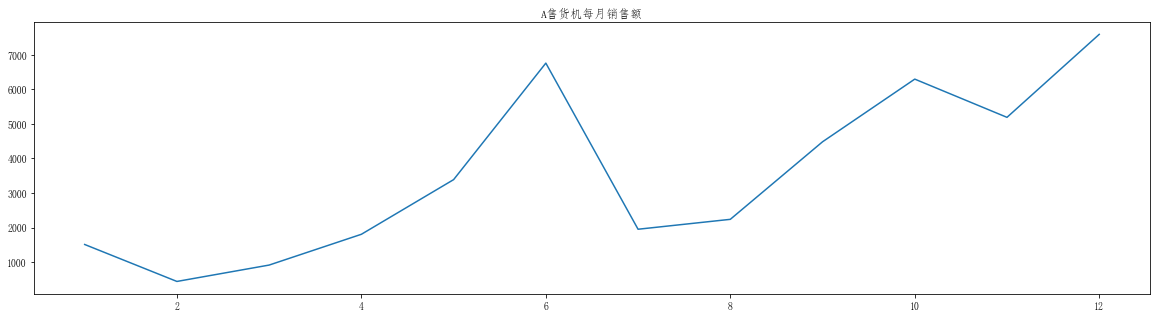

In [142]:
plt.figure(figsize=(20,5))
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = [MA1.实际金额.sum(),MA2.实际金额.sum(),MA3.实际金额.sum(),MA4.实际金额.sum(),MA5.实际金额.sum(),MA6.实际金额.sum(),
    MA7.实际金额.sum(),MA8.实际金额.sum(),MA9.实际金额.sum(),MA10.实际金额.sum(),MA11.实际金额.sum(),MA12.实际金额.sum()]
plt.plot(x,y)
plt.title("A售货机每月销售额")

Text(0.5, 1.0, 'B售货机每月销售额')

<Figure size 1440x360 with 0 Axes>

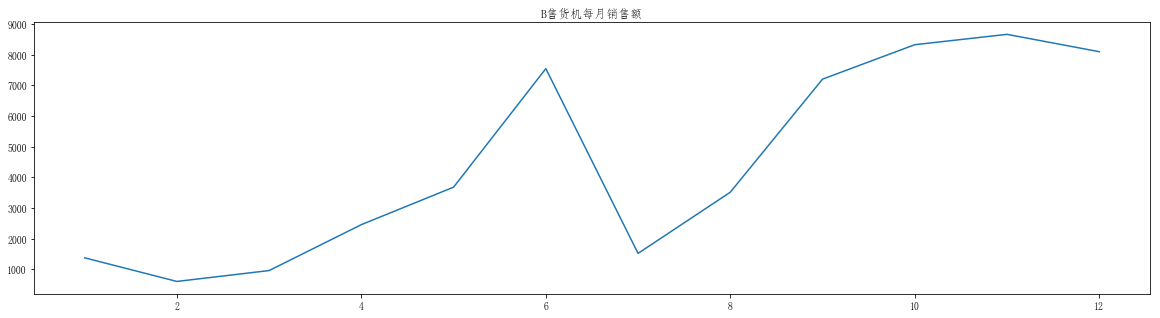

In [143]:
plt.figure(figsize=(20,5))

MB1 = machineB[machineB.支付时间.str.contains('2017/1/')]
MB1.shape[0]
moneyB1 = MB1.实际金额.sum()

MB2 = machineB[machineB.支付时间.str.contains('2017/2/')]
MB2.shape[0]
MB2.实际金额.sum()

MB3 = machineB[machineB.支付时间.str.contains('2017/3/')]
MB3.shape[0]
MB3.实际金额.sum()

MB4 = machineB[machineB.支付时间.str.contains('2017/4/')]
MB4.shape[0]
MB4.实际金额.sum()

MB5 = machineB[machineB.支付时间.str.contains('2017/5/')]
MB5.shape[0]
MB5.实际金额.sum()


MB6 = machineB[machineB.支付时间.str.contains('2017/6/')]
MB6.shape[0]
MB6.实际金额.sum()


MB7 = machineB[machineB.支付时间.str.contains('2017/7/')]
MB7.shape[0]
MB7.实际金额.sum()


MB8 = machineB[machineB.支付时间.str.contains('2017/8/')]
MB8.shape[0]
MB8.实际金额.sum()

MB9 = machineB[machineB.支付时间.str.contains('2017/9/')]
MB9.shape[0]
MB9.实际金额.sum()


MB10 = machineB[machineB.支付时间.str.contains('2017/10/')]
MB10.shape[0]
MB10.实际金额.sum()

MB11 = machineB[machineB.支付时间.str.contains('2017/11/')]
MB11.shape[0]
MB11.实际金额.sum()

MB12 = machineB[machineB.支付时间.str.contains('2017/12/')]
MB12.shape[0]
MB12.实际金额.sum()


plt.figure(figsize=(20,5))
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = [MB1.实际金额.sum(),MB2.实际金额.sum(),MB3.实际金额.sum(),MB4.实际金额.sum(),MB5.实际金额.sum(),MB6.实际金额.sum(),
    MB7.实际金额.sum(),MB8.实际金额.sum(),MB9.实际金额.sum(),MB10.实际金额.sum(),MB11.实际金额.sum(),MB12.实际金额.sum()]
plt.plot(x,y)
plt.title("B售货机每月销售额")


Text(0.5, 1.0, 'C售货机每月销售额')

<Figure size 1440x360 with 0 Axes>

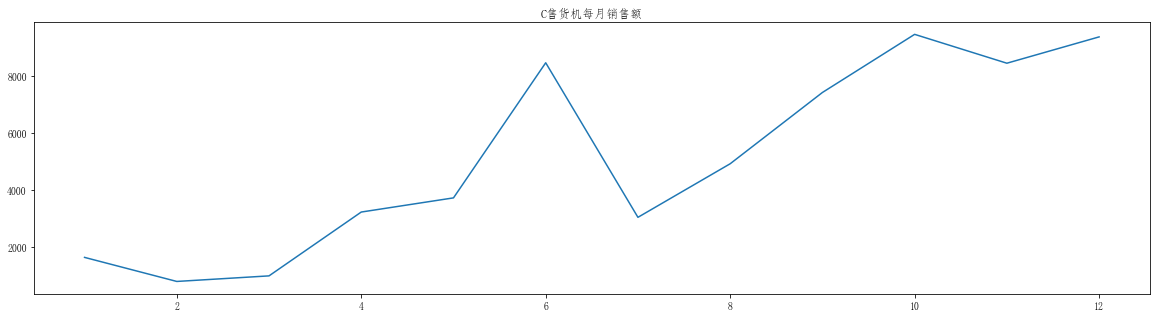

In [144]:
plt.figure(figsize=(20,5))

MC1 = machineC[machineC.支付时间.str.contains('2017/1/')]
MC1.shape[0]
moneyC1 = MC1.实际金额.sum()

MC2 = machineC[machineC.支付时间.str.contains('2017/2/')]
MC2.shape[0]
MC2.实际金额.sum()

MC3 = machineC[machineC.支付时间.str.contains('2017/3/')]
MC3.shape[0]

MC3.实际金额.sum()

MC4 = machineC[machineC.支付时间.str.contains('2017/4/')]
MC4.shape[0]
MC4.实际金额.sum()

MC5 = machineC[machineC.支付时间.str.contains('2017/5/')]
MC5.shape[0]
MC5.实际金额.sum()


MC6 = machineC[machineC.支付时间.str.contains('2017/6/')]
MC6.shape[0]
MC6.实际金额.sum()


MC7 = machineC[machineC.支付时间.str.contains('2017/7/')]
MC7.shape[0]
MC7.实际金额.sum()


MC8 = machineC[machineC.支付时间.str.contains('2017/8/')]
MC8.shape[0]
MC8.实际金额.sum()

MC9 = machineC[machineC.支付时间.str.contains('2017/9/')]
MC9.shape[0]
MC9.实际金额.sum()


MC10 = machineC[machineC.支付时间.str.contains('2017/10/')]
MC10.shape[0]
MC10.实际金额.sum()

MC11 = machineC[machineC.支付时间.str.contains('2017/11/')]
MC11.shape[0]
MC11.实际金额.sum()

MC12 = machineC[machineC.支付时间.str.contains('2017/12/')]
MC12.shape[0]
MC12.实际金额.sum()


plt.figure(figsize=(20,5))
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = [MC1.实际金额.sum(),MC2.实际金额.sum(),MC3.实际金额.sum(),MC4.实际金额.sum(),MC5.实际金额.sum(),MC6.实际金额.sum(),
    MC7.实际金额.sum(),MC8.实际金额.sum(),MC9.实际金额.sum(),MC10.实际金额.sum(),MC11.实际金额.sum(),MC12.实际金额.sum()]
plt.plot(x,y)
plt.title("C售货机每月销售额")


Text(0.5, 1.0, 'D售货机每月销售额')

<Figure size 1440x360 with 0 Axes>

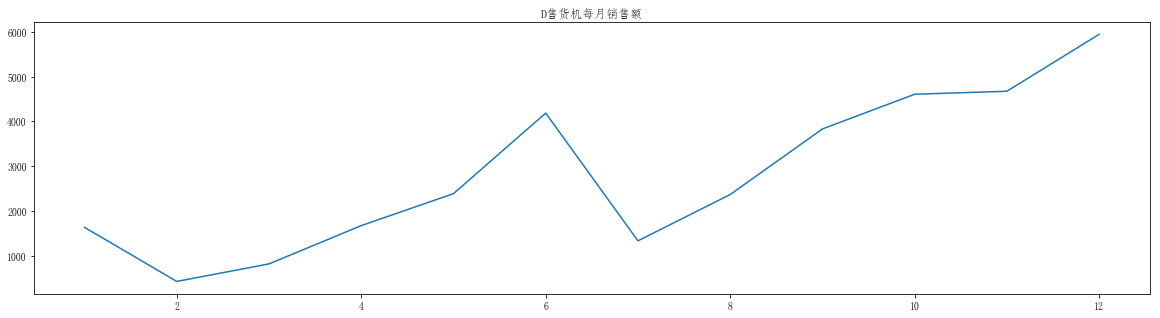

In [145]:
plt.figure(figsize=(20,5))

MD1 = machineC[machineC.支付时间.str.contains('2017/1/')]
MD1.shape[0]
moneyD1 = MD1.实际金额.sum()

MD2 = machineD[machineD.支付时间.str.contains('2017/2/')]
MD2.shape[0]
MD2.实际金额.sum()

MD3 = machineD[machineD.支付时间.str.contains('2017/3/')]
MD3.shape[0]

MD3.实际金额.sum()

MD4 = machineD[machineD.支付时间.str.contains('2017/4/')]
MD4.shape[0]
MD4.实际金额.sum()

MD5 = machineD[machineD.支付时间.str.contains('2017/5/')]
MD5.shape[0]
MD5.实际金额.sum()


MD6 = machineD[machineD.支付时间.str.contains('2017/6/')]
MD6.shape[0]
MD6.实际金额.sum()


MD7 = machineD[machineD.支付时间.str.contains('2017/7/')]
MD7.shape[0]
MD7.实际金额.sum()


MD8 = machineD[machineD.支付时间.str.contains('2017/8/')]
MD8.shape[0]
MD8.实际金额.sum()

MD9 = machineD[machineD.支付时间.str.contains('2017/9/')]
MD9.shape[0]
MD9.实际金额.sum()


MD10 = machineD[machineD.支付时间.str.contains('2017/10/')]
MD10.shape[0]
MD10.实际金额.sum()

MD11 = machineD[machineD.支付时间.str.contains('2017/11/')]
MD11.shape[0]
MD11.实际金额.sum()

MD12 = machineD[machineD.支付时间.str.contains('2017/12/')]
MD12.shape[0]
MD12.实际金额.sum()


plt.figure(figsize=(20,5))
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = [MD1.实际金额.sum(),MD2.实际金额.sum(),MD3.实际金额.sum(),MD4.实际金额.sum(),MD5.实际金额.sum(),MD6.实际金额.sum(),
    MD7.实际金额.sum(),MD8.实际金额.sum(),MD9.实际金额.sum(),MD10.实际金额.sum(),MD11.实际金额.sum(),MD12.实际金额.sum()]
plt.plot(x,y)
plt.title("D售货机每月销售额")


Text(0.5, 1.0, 'E售货机每月销售额')

<Figure size 1440x360 with 0 Axes>

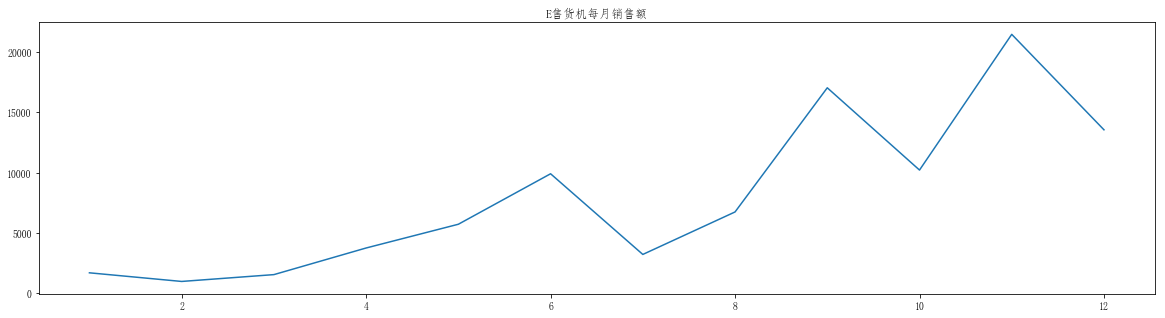

In [146]:
plt.figure(figsize=(20,5))

ME1 = machineE[machineE.支付时间.str.contains('2017/1/')]
ME1.shape[0]
moneyE1 = ME1.实际金额.sum()

ME2 = machineE[machineE.支付时间.str.contains('2017/2/')]
ME2.shape[0]
ME2.实际金额.sum()

ME3 = machineE[machineE.支付时间.str.contains('2017/3/')]
ME3.shape[0]

ME3.实际金额.sum()

ME4 = machineE[machineE.支付时间.str.contains('2017/4/')]
ME4.shape[0]
ME4.实际金额.sum()

ME5 = machineE[machineE.支付时间.str.contains('2017/5/')]
ME5.shape[0]
ME5.实际金额.sum()


ME6 = machineE[machineE.支付时间.str.contains('2017/6/')]
ME6.shape[0]
ME6.实际金额.sum()


ME7 = machineE[machineE.支付时间.str.contains('2017/7/')]
ME7.shape[0]
ME7.实际金额.sum()


ME8 = machineE[machineE.支付时间.str.contains('2017/8/')]
ME8.shape[0]
ME8.实际金额.sum()

ME9 = machineE[machineE.支付时间.str.contains('2017/9/')]
ME9.shape[0]
ME9.实际金额.sum()


ME10 = machineE[machineE.支付时间.str.contains('2017/10/')]
ME10.shape[0]
ME10.实际金额.sum()

ME11 = machineE[machineE.支付时间.str.contains('2017/11/')]
ME11.shape[0]
ME11.实际金额.sum()

ME12 = machineE[machineE.支付时间.str.contains('2017/12/')]
ME12.shape[0]
ME12.实际金额.sum()


plt.figure(figsize=(20,5))
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = [ME1.实际金额.sum(),ME2.实际金额.sum(),ME3.实际金额.sum(),ME4.实际金额.sum(),ME5.实际金额.sum(),ME6.实际金额.sum(),
    ME7.实际金额.sum(),ME8.实际金额.sum(),ME9.实际金额.sum(),ME10.实际金额.sum(),ME11.实际金额.sum(),ME12.实际金额.sum()]
plt.plot(x,y)
plt.title("E售货机每月销售额")


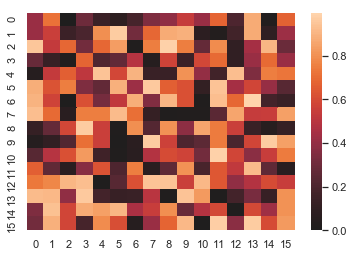

In [147]:

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import random

np.random.seed(1)
data = np.random.rand(16, 16)
sns.set()

ax = sns.heatmap(data, center=0)

#plt.savefig('res.png', dpi=300)

plt.show()

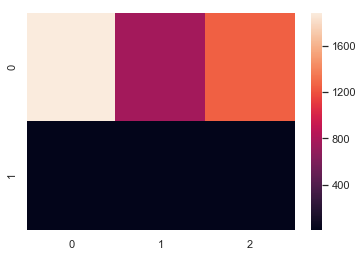

In [148]:
hotC = data1.loc[data1["地点"] == "C"]
sns.set()
hot0 = [1882,764,1259]
hot1 = [6,7,8]
sns.heatmap([hot0,hot1])
#hotC 

In [149]:
HOT6 = machineC[machineC.支付时间.str.contains('2017/6/')]
HOT6 = HOT6.支付时间.value_counts()

In [150]:
HOT7 = machineC[machineC.支付时间.str.contains('2017/7/')]
HOT7 = HOT7.支付时间.value_counts()

In [151]:
HOT8 = machineC[machineC.支付时间.str.contains('2017/8/')]
HOT8 = HOT8.支付时间.value_counts(),index=df.index
#list(HOT8)
HOT8 



SyntaxError: can't assign to function call (<ipython-input-151-dbcac77f4ce9>, line 2)

In [152]:
##售货机A商品标签
commodity = machineA.商品.value_counts()
len(commodity)
A = []
for i in range(len(commodity)):
    if commodity[i] >= 100:
        A.append("热销")
    elif commodity[i] <100 & commodity[i] >=50 :
        A.append("正常")
    elif commodity[i] >0:
        A.append("滞销")
commodity = pd.DataFrame(commodity)
commodity["标签"] = A
commodity.to_csv("task3-1A.csv")

In [153]:
commodity.head()

,商品,标签
怡宝纯净水,531,热销
东鹏特饮,448,热销
阿萨姆奶茶,326,热销
脉动,309,热销
30g无穷农场盐_鸡蛋,264,热销


In [154]:
len(A)

274

In [155]:
len(commodity)

274

In [156]:
##售货机B商品标签
commodityB = machineB.商品.value_counts()
len(commodityB)
B = []
for i in range(len(commodityB)):
    if commodityB[i] >= 100:
        B.append("热销")
    elif commodityB[i] <100 & commodityB[i] >=50 :
        B.append("正常")
    elif commodityB[i] >0:
        B.append("滞销")
commodityB = pd.DataFrame(commodityB)
commodityB["标签"] = B
commodityB.to_csv("task3-1B.csv")
commodityB.head()

,商品,标签
怡宝纯净水,1342,热销
东鹏特饮,488,热销
阿萨姆奶茶,457,热销
脉动,431,热销
营养快线,425,热销


In [157]:
##售货机C商品标签
commodityC = machineC.商品.value_counts()
len(commodityC)
C = []
for i in range(len(commodityC)):
    if commodityC[i] >= 100:
        C.append("热销")
    elif commodityC[i] <100 & commodityC[i] >=50 :
        C.append("正常")
    elif commodityC[i] >0:
        C.append("滞销")
commodityC = pd.DataFrame(commodityC)
commodityC["标签"] = C
commodityC.to_csv("task3-1C.csv")
commodityC.head()

,商品,标签
怡宝纯净水,999,热销
脉动,759,热销
东鹏特饮,525,热销
阿萨姆奶茶,456,热销
营养快线,435,热销


In [158]:
##售货机D商品标签
commodityD = machineD.商品.value_counts()
len(commodityC)
D = []
for i in range(len(commodityD)):
    if commodityD[i] >= 100:
        D.append("热销")
    elif commodityD[i] <100 & commodityD[i] >=50 :
        D.append("正常")
    elif commodityD[i] >0:
        D.append("滞销")
commodityD = pd.DataFrame(commodityD)
commodityD["标签"] = D
commodityD.to_csv("task3-1D.csv")
commodityD.head()

,商品,标签
东鹏特饮,411,热销
怡宝纯净水,387,热销
阿萨姆奶茶,365,热销
营养快线,319,热销
统一冰红茶,309,热销


In [159]:
##售货机E商品标签
commodityE = machineE.商品.value_counts()
len(commodityE)
E = []
for i in range(len(commodityE)):
    if commodityE[i] >= 100:
        E.append("热销")
    elif commodityE[i] <100 & commodityE[i] >=50 :
        E.append("正常")
    elif commodityE[i] >0:
        E.append("滞销")
commodityE = pd.DataFrame(commodityE)
commodityE["标签"] = E
commodityE.to_csv("task3-1E.csv")
commodityE.head()

,商品,标签
怡宝纯净水,1705,热销
脉动,996,热销
营养快线,805,热销
阿萨姆奶茶,792,热销
东鹏特饮,709,热销


Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'random', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(-0.5, 999.5, 799.5, -0.5)

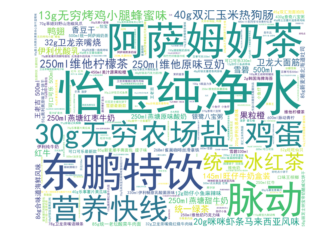

In [160]:
#售货机A云图
filename = "GoodA.csv"
with open(filename,encoding='utf-8') as f:
    mytextA = f.read()
wordcloud = WordCloud(font_path='./fonts/simhei.ttf',background_color="white",width=1000,height=800).generate(mytextA)
%pylab inline
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(-0.5, 999.5, 799.5, -0.5)

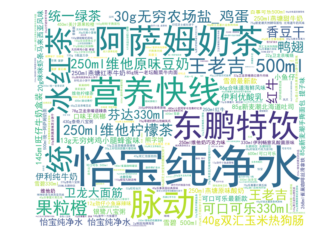

In [161]:
#售货机B云图
filenameB = "GoodB.csv"
with open(filenameB,encoding='utf-8') as f:
    mytextB = f.read()
wordcloud = WordCloud(font_path='./fonts/simhei.ttf',background_color="white",width=1000,height=800).generate(mytextB)
%pylab inline
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(-0.5, 999.5, 799.5, -0.5)

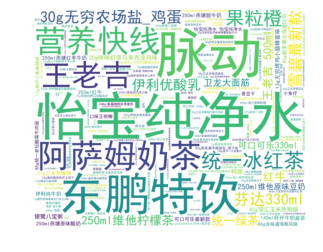

In [162]:
#售货机C云图
filenameC = "GoodC.csv"
with open(filenameC,encoding='utf-8') as f:
    mytextC = f.read()
wordcloud = WordCloud(font_path='./fonts/simhei.ttf',background_color="white",width=1000,height=800).generate(mytextC)
%pylab inline
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(-0.5, 999.5, 799.5, -0.5)

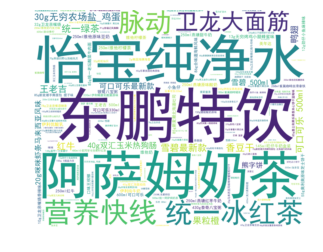

In [163]:
#售货机D云图
filenameD = "GoodD.csv"
with open(filenameD,encoding='utf-8') as f:
    mytextD = f.read()
wordcloud = WordCloud(font_path='./fonts/simhei.ttf',background_color="white",width=1000,height=800).generate(mytextD)
%pylab inline
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Populating the interactive namespace from numpy and matplotlib


D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


(-0.5, 999.5, 799.5, -0.5)

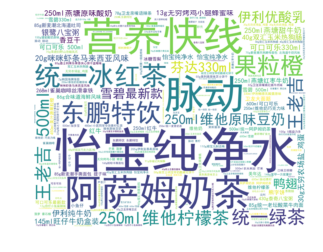

In [164]:
#售货机E云图
filenameE = "GoodE.csv"
with open(filenameE,encoding='utf-8') as f:
    mytextE = f.read()
wordcloud = WordCloud(font_path='./fonts/simhei.ttf',background_color="white",width=1000,height=800).generate(mytextE)
%pylab inline
plt.rcParams['font.sans-serif'] = 'SimHei' ## 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [165]:
pxA= np.array([1,2,3,4,5,6,7,8,9,10,11,12]).reshape(-1,1)

In [166]:
pxA

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

In [167]:
pyA = [MB1.实际金额.sum(),MB2.实际金额.sum(),MB3.实际金额.sum(),MB4.实际金额.sum(),MB5.实际金额.sum(),MB6.实际金额.sum(),
    MB7.实际金额.sum(),MB8.实际金额.sum(),MB9.实际金额.sum(),MB10.实际金额.sum(),MB11.实际金额.sum(),MB12.实际金额.sum()]

In [168]:
pyA

[1373.6,
 602.3,
 957.9000000000001,
 2457.3999999999996,
 3681.2,
 7550.299999999999,
 1518.6,
 3516.1,
 7207.299999999999,
 8331.6,
 8669.900000000001,
 8104.1]

-1251463.9756391777
0.8349683211250559
[1044.18224638 1492.27246377 1940.36268116 2388.45289855 2836.54311594
 3284.63333333 3732.72355072 4180.81376812 4628.90398551 5076.9942029
 5525.08442029 5973.17463768]


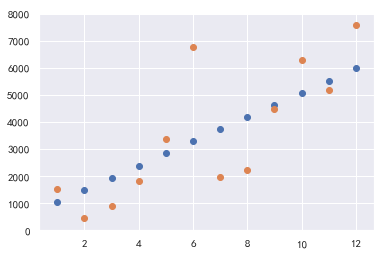

In [295]:
pxA= np.array([1,2,3,4,5,6,7,8,9,10,11,12]).reshape(-1,1)
pyA = [MA1.实际金额.sum(),MA2.实际金额.sum(),MA3.实际金额.sum(),MA4.实际金额.sum(),MA5.实际金额.sum(),MA6.实际金额.sum(),
    MA7.实际金额.sum(),MA8.实际金额.sum(),MA9.实际金额.sum(),MA10.实际金额.sum(),MA11.实际金额.sum(),MA12.实际金额.sum()]

from sklearn.model_selection import train_test_split
xtrainA,xtestA,ytrainA,ytestA = train_test_split(pxA,pyA,test_size = 0.2)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrainA,ytrainA)
train_score = model.score(xtrainA,xtrainA)
cv_score = model.score(xtestA,ytestA)
print(train_score)
print(cv_score)
yuciA = model.predict(pxA)
print(yuciA)
plt.scatter(pxA,yuciA)
plt.scatter(pxA,pyA)


-3176678.5312699964
0.9287588518402796
[ 301.27606838 1046.78376068 1792.29145299 2537.7991453  3283.30683761
 4028.81452991 4774.32222222 5519.82991453 6265.33760684 7010.84529915
 7756.35299145 8501.86068376]


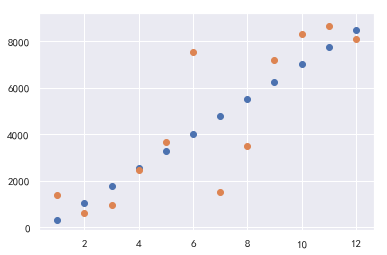

In [293]:
pxB= np.array([1,2,3,4,5,6,7,8,9,10,11,12]).reshape(-1,1)
pyB = [MB1.实际金额.sum(),MB2.实际金额.sum(),MB3.实际金额.sum(),MB4.实际金额.sum(),MB5.实际金额.sum(),MB6.实际金额.sum(),
    MB7.实际金额.sum(),MB8.实际金额.sum(),MB9.实际金额.sum(),MB10.实际金额.sum(),MB11.实际金额.sum(),MB12.实际金额.sum()]

from sklearn.model_selection import train_test_split
xtrainB,xtestB,ytrainB,ytestB = train_test_split(pxB,pyB,test_size = 0.2)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrainB,ytrainB)
train_score = model.score(xtrainB,xtrainB)
cv_score = model.score(xtestB,ytestB)
print(train_score)
print(cv_score)
yuciB = model.predict(pxB)
print(yuciB)
plt.scatter(pxB,yuciB)
plt.scatter(pxB,pyB)

-3326390.090417468
0.8819912976080768
[ 245.68562092 1107.94542484 1970.20522876 2832.46503268 3694.7248366
 4556.98464052 5419.24444444 6281.50424837 7143.76405229 8006.02385621
 8868.28366013 9730.54346405]


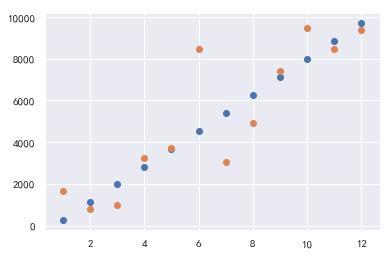

In [287]:
pxC= np.array([1,2,3,4,5,6,7,8,9,10,11,12]).reshape(-1,1)
pyC = [MC1.实际金额.sum(),MC2.实际金额.sum(),MC3.实际金额.sum(),MC4.实际金额.sum(),MC5.实际金额.sum(),MC6.实际金额.sum(),
    MC7.实际金额.sum(),MC8.实际金额.sum(),MC9.实际金额.sum(),MC10.实际金额.sum(),MC11.实际金额.sum(),MC12.实际金额.sum()]

from sklearn.model_selection import train_test_split
xtrainC,xtestC,ytrainC,ytestC = train_test_split(pxC,pyC,test_size = 0.2)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrainC,ytrainC)
train_score = model.score(xtrainC,xtrainC)
cv_score = model.score(xtestC,ytestC)
print(train_score)
print(cv_score)
yuciC = model.predict(pxC)
print(yuciC)
plt.scatter(pxC,yuciC)
plt.scatter(pxC,pyC)

-772313.1132223958
0.8100025485429834
[ 746.8425     1101.89291667 1456.94333333 1811.99375    2167.04416667
 2522.09458333 2877.145      3232.19541667 3587.24583333 3942.29625
 4297.34666667 4652.39708333]


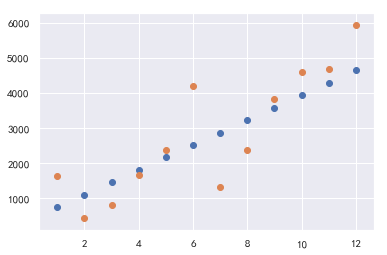

In [286]:
pxD= np.array([1,2,3,4,5,6,7,8,9,10,11,12]).reshape(-1,1)
pyD = [MD1.实际金额.sum(),MD2.实际金额.sum(),MD3.实际金额.sum(),MD4.实际金额.sum(),MD5.实际金额.sum(),MD6.实际金额.sum(),
    MD7.实际金额.sum(),MD8.实际金额.sum(),MD9.实际金额.sum(),MD10.实际金额.sum(),MD11.实际金额.sum(),MD12.实际金额.sum()]

from sklearn.model_selection import train_test_split
xtrainD,xtestD,ytrainD,ytestD = train_test_split(pxD,pyD,test_size = 0.2)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrainD,ytrainD)
train_score = model.score(xtrainD,xtrainD)
cv_score = model.score(xtestD,ytestD)
print(train_score)
print(cv_score)
yuciD = model.predict(pxD)
print(yuciD)
plt.scatter(pxD,yuciD)
plt.scatter(pxD,pyD)

-6550525.972817889
0.6682754881877878
[  539.27822222  1823.42188889  3107.56555556  4391.70922222
  5675.85288889  6959.99655556  8244.14022222  9528.28388889
 10812.42755556 12096.57122222 13380.71488889 14664.85855556]


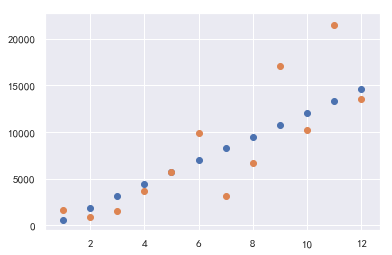

In [325]:
pxE= np.array([1,2,3,4,5,6,7,8,9,10,11,12]).reshape(-1,1)
pyE = [ME1.实际金额.sum(),ME2.实际金额.sum(),ME3.实际金额.sum(),ME4.实际金额.sum(),ME5.实际金额.sum(),ME6.实际金额.sum(),
    ME7.实际金额.sum(),ME8.实际金额.sum(),ME9.实际金额.sum(),ME10.实际金额.sum(),ME11.实际金额.sum(),ME12.实际金额.sum()]

from sklearn.model_selection import train_test_split
xtrainE,xtestE,ytrainE,ytestE = train_test_split(pxE,pyE,test_size = 0.2)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrainE,ytrainE)
train_score = model.score(xtrainE,xtrainE)
cv_score = model.score(xtestE,ytestE)
print(train_score)
print(cv_score)
yuciE = model.predict(pxE)
print(yuciE)
plt.scatter(pxE,yuciE)
plt.scatter(pxE,pyE)